##  Lenet5 Inspired Models -JackieN 
This File Produces A number of Lenet5 inspired Models and Predictions based on varying degrees of cleaned Train data.

Based on https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086 and 

https://deepai.org/publication/towards-good-practices-on-building-effective-cnn-baseline-model-for-person-re-identification#:~:text=The%20last%20key%20practice%20is%20to%20train%20CNN,based%20on%20the%20adaptive%20estimates%20of%20lower-order%20moments.

The best score produced from the model using the clean data with all outliers removed is: 2.48797  

Placing at position 51 on the leaderboard

![](https://i.imgur.com/BiDsWBP.jpg)
 

### Imports

Set the UTILS_PATH to be the locaiton of your utils directory.  This will allow for the use of the loading of load_models and predict_models

In [1]:
#Set the utils path to point to the utils directory locally
UTILS_PATH = "MODIFY THIS"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
import imp
import pickle



### Helper Path Functions

Two helper functions were created for simplification:

- set_train_paths: This sets the following paths and must be done prior to calling create_model() and create_predictions() 
    - model_path - location the model files should be saved 
    - train_path - location of the clean train pickle files to use for model creation

- set_test_paths: This sets the following paths and must be done prior to calling create_model() and create_predictions() 
    - test_path - location of test pickle file
    - id_lookup - location the id_lookup pickle file 
    - prediction_path - location of where the prediction csv should be saved
 

In [2]:
def set_train_paths(model_path, train_path="C:/Data/CleanTrain/", ):
    global file_path
    global trainer
    global output_model_path
    file_path = train_path
    output_model_path=model_path
    trainer = LoadTrainModels(output_model_path, file_path)
    trainer.print_paths()

def set_test_paths(test_path="../Data/test.p", id_lookup_path="../Data/id_lookup.p", prediction_path = "C:/data/Predictions/"):
    global pred_path
    global predictor
    global id_lookup
    global test

    id_lookup = pickle.load( open(id_lookup_path , "rb" ) )
    test = pickle.load( open(test_path , "rb" ) )
    pred_path = prediction_path
    predictor = PredictModels(output_model_path,pred_path , id_lookup)
    predictor.print_paths()


### Helper Model Functions

Two helper functions were created for simplification:

- create_model: This takes care of opening files in a directory and passing along setting to the utils class LoadTrainModels which will apply any augmentation, split, and train the models. The model files will be stored at the specified location. You must ensure that the set_train_paths() funciton is called prior to this with the appropriate paths set. 

- create_predictions: This takes care of opening model files in a directory and passing along settings to the utils class PredictModels which will generate a predictions csv per model. You must ensure that the set_train_paths() and set_test_paths() funcitons are called prior to this with the appropriate paths set. 

In [3]:
def create_model(aug = False, vary_layers = False, hoizontal_flip = False,brightness = 1, dim = 1, separate = False):
    files = os.listdir(file_path)
    num_layers = 6
    #For every version of a cleaned Train file in CleanTrain directory, create and save a model
    for filename in files: 
        print("Opening file: ", filename)
        clean_file = "".join((file_path,filename))
        train_data = pickle.load( open( clean_file, "rb" ) )
        train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
        print("Train Shape:", train_data.shape)
        filename = str(filename).replace('.p', '').strip()
        

        #Setting layers:
        #layers = 2 equates to 9 model layers
        #layers = 3 equates to 11 model layers
        #layers = 4 equates to 13 model layers
        #layers >= 5 equates to 15 model layers
        if vary_layers:
            #Now for each model, let's try different layers
            for num_layers in range(2,6):
                print("Begin model and train:")
                model_name = "".join((filename,str(num_layers),"layers_Lenet5"))
                print("Model name:", model_name)
                model, history = trainer.train_model(model_name, train_data, hoizontal_flip = hoizontal_flip,aug = aug, brightness = brightness, dim = dim,layers=num_layers, separate = separate)
                print("End model and train")    
                print()
        else:
            print("Begin model and train:")
            model_name = "".join((filename,"_Lenet5"))
            print("Model name:", model_name)
            model, history = trainer.train_model(model_name, train_data, aug = aug, hoizontal_flip = hoizontal_flip,brightness = brightness, dim = dim,layers=num_layers, separate = separate)
            print("End model and train")    
            print()

        


def create_predictions(columns = "Full"):
    files = os.listdir(output_model_path)
    #For every model in file_path, predict using the model and save the predictions in CSV file
    for filename in files:
        if ".h5" in filename:
            base_name = filename[:-3]
            model_json = ''.join((base_name,".json"))
            print("Working with: ", base_name)
            print("Begin Predict")
            #The predict_standard makes predictions and stores them in a pred_path location speficied.
            #pred_path is set via the set_test_paths function call
            Y= predictor.predict_standard(base_name, filename, model_json, test, columns=columns)
            print("End model and train")    
            print()

def combine_predictions(full_path, seperate_path):
    predictor.combine_predictions(full_path, seperate_path)

## Baseline test

To begin, let's run the model against the raw train data to determine baseline. Once we have a baseline, we can attempt to improve from that.  

This cell calls the set_train_paths with the paths of the output of the model creation and the path of the train file. It then creates the model. The directory output is seen below:

![](https://i.imgur.com/qT7mF5c.jpg)







tep - loss: 0.0017 - mae: 0.0301 - mse: 0.0017 - val_loss: 0.0025 - val_mae: 0.0374 - val_mse: 0.0025

Epoch 00014: val_mae improved from 0.03928 to 0.03743, saving model to C:/data/Jackie_Lenet5_Raw\train_Lenet5.h5
Epoch 15/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0026 - val_mae: 0.0387 - val_mse: 0.0026

Epoch 00015: val_mae did not improve from 0.03743
Epoch 16/300
17/17 [==============================] - 0s 19ms/step - loss: 0.0016 - mae: 0.0284 - mse: 0.0016 - val_loss: 0.0022 - val_mae: 0.0360 - val_mse: 0.0022

Epoch 00016: val_mae improved from 0.03743 to 0.03595, saving model to C:/data/Jackie_Lenet5_Raw\train_Lenet5.h5
Epoch 17/300
17/17 [==============================] - 0s 20ms/step - loss: 0.0016 - mae: 0.0289 - mse: 0.0016 - val_loss: 0.0020 - val_mae: 0.0344 - val_mse: 0.0020

Epoch 00017: val_mae improved from 0.03595 to 0.03441, saving model to C:/data/Jackie_Lenet5_Raw\train_Lenet5.h5
Epoch 18/3

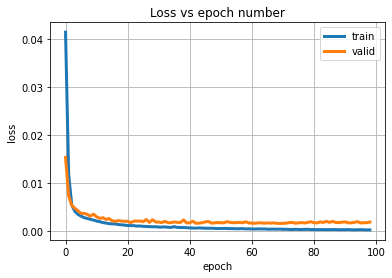

train_Lenet5 model created and file saved for future use.
End model and train



In [4]:

set_train_paths("C:/data/Jackie_Lenet5_Raw", "C:/Data/RawTrain/")
#Get the files in the clean directory
create_model()
    

## Baseline Prediction 

For the model created above, predict using the model and save the predictions in CSV file for submission. 

Following the cell above, it's now time to make some predictions.  The following cell, 

- sets the test paths: set the path where train dataset is location, set the path the prediction should be saved
- loops through the directory and for each model (json file)
    1. Create a prediction and store in specified location.

The baseline approach was submitted and recieved the score below: 

![](https://i.imgur.com/JW2wJfQ.jpg)


Note: If you would like to run this cell, please update the paths accordingly. 

In [5]:
#Time to make some predictions
set_test_paths()
create_predictions()




Model dir: C:/data/Jackie_Lenet5_Raw/
Prediction dir: C:/data/Predictions/
Working with:  train_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/train_Lenet5Pred.csv
Predictions written 
End model and train



## Improvement to Baseline

Four attemps were made to improve against baseline and followed the following pipeline approach:

![](https://i.imgur.com/jlxPolW.png)

- Approach 1: all versions of cleaned train data (clean section) set were used to create models and predictions 
- Approach 2: all versions of cleaned train data (clean section) set were used + varying the layers in the model used to create models and predictions
- Approach 3: all versions of cleaned train data (clean section) set were used + varying layers + image augmentation (brightness and dim) to create models and predictions


The following two appoaches take a slightly different approach by creating a model with 30 keypoints and then with 8 keypoints and combining the predictions into a single CSV. 

![](https://i.imgur.com/1UUDUSy.jpg)

- Approach 4: use different cleaned versions of train data set flip the images, add brigthness=0 dim = 0 for 30 keypoints and 8 keypoints. 
- Approach 5: use only clean_all_outliers of train data set flip the images, add brigthness=1.4 dim = 0.3 for 30 keypoints and 8 keypoints full layers. (best result came from this test)

All five are described in the following cells. 




### Approach 1: Use different cleaned versions of train data set

Now it's time to see if we can improve from baseline.  For this attempt, we will create a model for every version of a clean Train file in a given path, create and save a model.

![](https://i.imgur.com/S7FhUkH.jpg)





This cell looped through the directory of clean trail files which appears below and created a model for each file. Please refer to the Readme file for more information on each.


![](https://i.imgur.com/bNZTV5a.jpg)



The following cell produced the prediction with the best result for the clean file named: clean_all_outliers.  This means that the train file that was cleaned by removing all outliers produced the best result with these settings. 

![](https://i.imgur.com/kbpD4Eo.jpg)

ReLU)               (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                3870      
Total params: 4,134,474
Trainable params: 4,134,474
Non-trainable params: 0
_________________________________________________________________
None
Compiling complete
Batch size: 128
Epoch 1/300
17/17 [==============================] - 1s 33ms/step - loss: 0.0607 - mae: 0.1838 - mse: 0.0607 - val_loss: 0.0086 - val_mae: 0.0738 - val_mse: 0.0086

Epoch 00001: val_mae improved from inf to 0.07385, saving model to C:/data/Jackie_Lenet5_AllClean\clean_all_outliers_Lenet5.h5
Epoch 2/300
17/17 [==============================] - 0s 19ms/step - loss: 0.0064 - mae: 0.0596 - mse: 0.0064 - val_loss: 0.0051 - val_mae: 0.0564 - val_mse: 0.0051

Epoch 00002: val_mae improved from 0.07385 to 0.05642, saving model to C:/data/Jackie_Lenet5_AllClean\clean_all_outliers_Lenet5.h5
Epoch 3/300
17/17 [======================

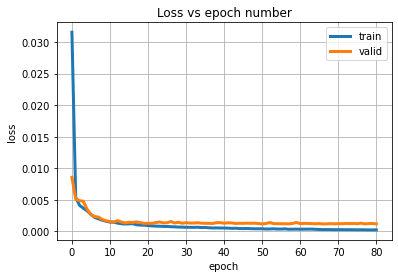

.7190e-04 - val_loss: 0.0056 - val_mae: 0.0423 - val_mse: 0.0056

Epoch 00047: val_mae did not improve from 0.04046
Epoch 48/300
17/17 [==============================] - 0s 19ms/step - loss: 7.5925e-04 - mae: 0.0200 - mse: 7.5925e-04 - val_loss: 0.0056 - val_mae: 0.0413 - val_mse: 0.0056

Epoch 00048: val_mae did not improve from 0.04046
Epoch 49/300
17/17 [==============================] - 0s 19ms/step - loss: 7.7091e-04 - mae: 0.0203 - mse: 7.7091e-04 - val_loss: 0.0058 - val_mae: 0.0441 - val_mse: 0.0058

Epoch 00049: val_mae did not improve from 0.04046
Epoch 50/300
17/17 [==============================] - 0s 18ms/step - loss: 7.4974e-04 - mae: 0.0201 - mse: 7.4974e-04 - val_loss: 0.0055 - val_mae: 0.0411 - val_mse: 0.0055

Epoch 00050: val_mae did not improve from 0.04046
Epoch 51/300
17/17 [==============================] - 0s 19ms/step - loss: 7.7957e-04 - mae: 0.0206 - mse: 7.7957e-04 - val_loss: 0.0056 - val_mae: 0.0415 - val_mse: 0.0056

Epoch 00051: val_mae did not improve f

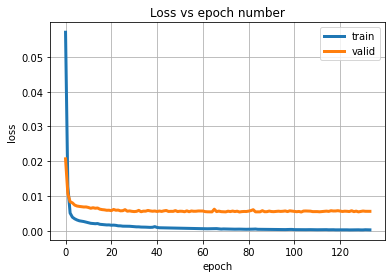

 - mae: 0.0295 - mse: 0.0017 - val_loss: 0.0020 - val_mae: 0.0334 - val_mse: 0.0020

Epoch 00014: val_mae did not improve from 0.03338
Epoch 15/300
17/17 [==============================] - 0s 17ms/step - loss: 0.0016 - mae: 0.0288 - mse: 0.0016 - val_loss: 0.0020 - val_mae: 0.0337 - val_mse: 0.0020

Epoch 00015: val_mae did not improve from 0.03338
Epoch 16/300
17/17 [==============================] - 0s 21ms/step - loss: 0.0017 - mae: 0.0298 - mse: 0.0017 - val_loss: 0.0018 - val_mae: 0.0327 - val_mse: 0.0018

Epoch 00016: val_mae improved from 0.03338 to 0.03273, saving model to C:/data/Jackie_Lenet5_AllClean\clean_o_dups_Lenet5.h5
Epoch 17/300
17/17 [==============================] - 0s 18ms/step - loss: 0.0015 - mae: 0.0282 - mse: 0.0015 - val_loss: 0.0017 - val_mae: 0.0317 - val_mse: 0.0017

Epoch 00017: val_mae improved from 0.03273 to 0.03171, saving model to C:/data/Jackie_Lenet5_AllClean\clean_o_dups_Lenet5.h5
Epoch 18/300
17/17 [==============================] - 0s 19ms/step 

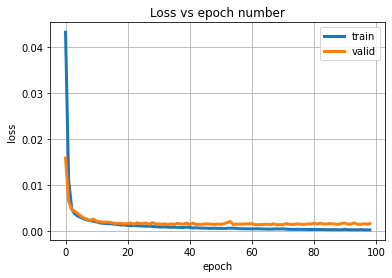

clean_o_dups_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_o_outliers.p
Train Shape: (7020, 31)
Begin model and train:
Model name: clean_o_outliers_Lenet5
Scaling images
Scaling complete.
Skipping brightness
Skipping dim
Completed brighten and dim. Number of observations added to train: 7020
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_20 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 47, 47, 6)         0         
__________________________________________________________

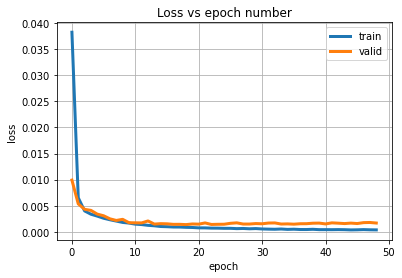

l_mae: 0.0344 - val_mse: 0.0022

Epoch 00012: val_mae improved from 0.03650 to 0.03438, saving model to C:/data/Jackie_Lenet5_AllClean\clean_wo_dups_Lenet5.h5
Epoch 13/300
17/17 [==============================] - 0s 18ms/step - loss: 0.0015 - mae: 0.0277 - mse: 0.0015 - val_loss: 0.0025 - val_mae: 0.0377 - val_mse: 0.0025

Epoch 00013: val_mae did not improve from 0.03438
Epoch 14/300
17/17 [==============================] - 0s 18ms/step - loss: 0.0014 - mae: 0.0276 - mse: 0.0014 - val_loss: 0.0022 - val_mae: 0.0339 - val_mse: 0.0022

Epoch 00014: val_mae improved from 0.03438 to 0.03391, saving model to C:/data/Jackie_Lenet5_AllClean\clean_wo_dups_Lenet5.h5
Epoch 15/300
17/17 [==============================] - 0s 18ms/step - loss: 0.0013 - mae: 0.0254 - mse: 0.0013 - val_loss: 0.0020 - val_mae: 0.0321 - val_mse: 0.0020

Epoch 00015: val_mae improved from 0.03391 to 0.03206, saving model to C:/data/Jackie_Lenet5_AllClean\clean_wo_dups_Lenet5.h5
Epoch 16/300
17/17 [=====================

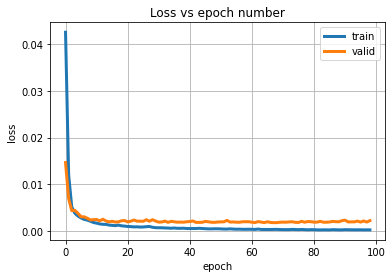

ing images
Scaling complete.
Skipping brightness
Skipping dim
Completed brighten and dim. Number of observations added to train: 6488
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_30 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_12 (Averag (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 16)        880       
_________________________________________________________________
re_lu_31 (ReLU)              (None, 45, 45, 16)        0         
_

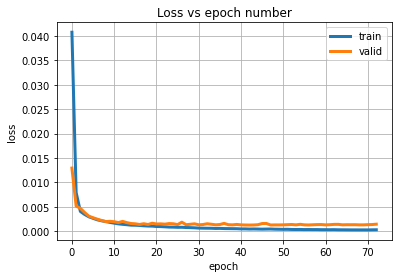

_______________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               3965440   
_________________________________________________________________
re_lu_37 (ReLU)              (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
re_lu_38 (ReLU)              (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
re_lu_39 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)            

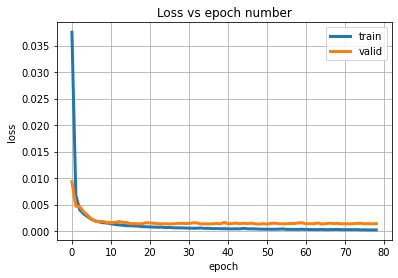

clean_w_outliers_Lenet5 model created and file saved for future use.
End model and train

Model dir: C:/data/Jackie_Lenet5_AllClean/
Prediction dir: C:/data/Predictions/
Working with:  clean_all_outliers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_all_outliers_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_duplicates_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_duplicates_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_o_dups_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)


In [6]:
set_train_paths(model_path= "C:/data/Jackie_Lenet5_AllClean")
#Get the files in the clean directory and create a model for each
create_model(vary_layers = False)

#Peform the predictions
set_test_paths()
create_predictions()

### Approach 2: Use different cleaned versions of train data set and vary the layers of the model. 

The following cell is an advanced version.  No transformations to the data were applied but the model is adjusted by adding layers. This cell will create 5 models with varying layers per clean file (e.g. if you have 2 clean files you will end up with 10 models). 

Setting layers:

- layers = 2 equates to 9 model layers
- layers = 3 equates to 11 model layers
- layers = 4 equates to 13 model layers
- layers >= 5 equates to 15 model layers


In this example, I only use the clean_all_outliers clean train file since it produced the best results previously.

![](https://i.imgur.com/0UPWIj1.jpg)

Note: run at your own risk suggest only one clean file in the directory at a time. I did run this on all 7 clean files and it worked! 

![](https://i.imgur.com/NDedKbW.jpg)


   
_________________________________________________________________
dense_32 (Dense)             (None, 30)                232350    
Total params: 233,290
Trainable params: 233,290
Non-trainable params: 0
_________________________________________________________________
None
Compiling complete
Batch size: 128
Epoch 1/300
17/17 [==============================] - 1s 30ms/step - loss: 0.0691 - mae: 0.2029 - mse: 0.0691 - val_loss: 0.0171 - val_mae: 0.1034 - val_mse: 0.0171

Epoch 00001: val_mae improved from inf to 0.10340, saving model to C:/data/Jackie_Lenet5_Layers\clean_all_outliers2layers_Lenet5.h5
Epoch 2/300
17/17 [==============================] - 0s 16ms/step - loss: 0.0168 - mae: 0.0976 - mse: 0.0168 - val_loss: 0.0072 - val_mae: 0.0659 - val_mse: 0.0072

Epoch 00002: val_mae improved from 0.10340 to 0.06589, saving model to C:/data/Jackie_Lenet5_Layers\clean_all_outliers2layers_Lenet5.h5
Epoch 3/300
17/17 [==============================] - 0s 16ms/step - loss: 0.0052 - mae: 

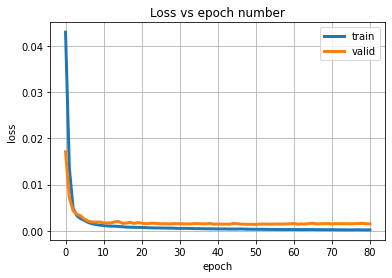

clean_all_outliers2layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers3layers_Lenet5
Scaling images
Scaling complete.
Skipping brightness
Skipping dim
Completed brighten and dim. Number of observations added to train: 7041
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_42 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_18 (Averag (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)          

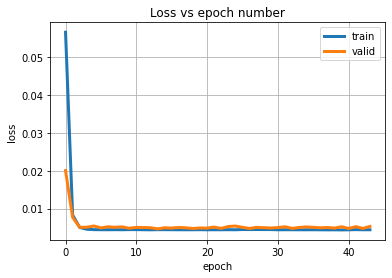

clean_all_outliers3layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers4layers_Lenet5
Scaling images
Scaling complete.
Skipping brightness
Skipping dim
Completed brighten and dim. Number of observations added to train: 7041
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_45 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_20 (Averag (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)         

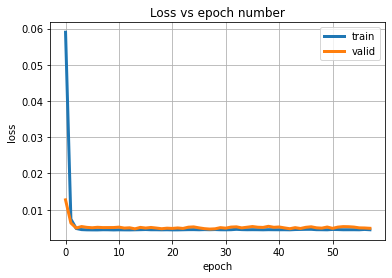

clean_all_outliers4layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers5layers_Lenet5
Scaling images
Scaling complete.
Skipping brightness
Skipping dim
Completed brighten and dim. Number of observations added to train: 7041
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_49 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_22 (Averag (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_23 (Conv2D)         

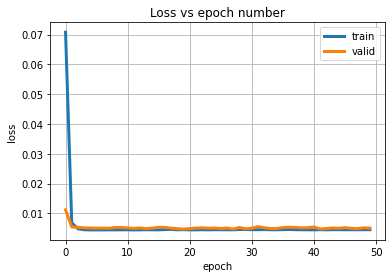

clean_all_outliers5layers_Lenet5 model created and file saved for future use.
End model and train

Model dir: C:/data/Jackie_Lenet5_Layers/
Prediction dir: C:/data/Predictions/
Working with:  clean_all_outliers2layers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_all_outliers2layers_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers3layers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions/clean_all_outliers3layers_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers4layers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124

In [9]:
set_train_paths(model_path= "C:/data/Jackie_Lenet5_Layers", train_path= "C:/Data/CleanTrain_1/")
#Get the files in the clean directory, try different layers to create some models
create_model(vary_layers = True)

#Peform the predictions
set_test_paths()
create_predictions()
    

### Approach 3: Use different cleaned versions of train data set and vary the layers of the model and augment the data. 

The following cell is an advanced version.  The brightness and dim were adjusted on the images and the model is adjusted by adding layers. This cell will creates 4 models with varying layers per clean file (e.g. if you have 2 clean files you will end up with 8 models).  

In this example, I only use the clean_all_outliers clean train file since it produced the best results previously.  

The best performing was the layers=2 (9 model layers) with bright and dim set but still did not beat approach 1: 

![](https://i.imgur.com/rF9Crwr.jpg)

Note: run at your own risk suggest only one clean file in the directory at a time. I did run this on all 7 clean files and it worked! 

34 [==============================] - 0s 14ms/step - loss: 2.1975e-04 - mae: 0.0112 - mse: 2.1975e-04 - val_loss: 0.0012 - val_mae: 0.0261 - val_mse: 0.0012

Epoch 00141: val_mae did not improve from 0.02471
Epoch 142/300
34/34 [==============================] - 0s 14ms/step - loss: 2.0814e-04 - mae: 0.0108 - mse: 2.0814e-04 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011

Epoch 00142: val_mae did not improve from 0.02471
Epoch 143/300
34/34 [==============================] - 0s 14ms/step - loss: 2.0704e-04 - mae: 0.0107 - mse: 2.0704e-04 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011

Epoch 00143: val_mae did not improve from 0.02471
Epoch 144/300
34/34 [==============================] - 0s 14ms/step - loss: 2.1447e-04 - mae: 0.0110 - mse: 2.1447e-04 - val_loss: 0.0013 - val_mae: 0.0271 - val_mse: 0.0013

Epoch 00144: val_mae did not improve from 0.02471
Epoch 145/300
34/34 [==============================] - 0s 13ms/step - loss: 2.1581e-04 - mae: 0.0110 - mse: 2.1581e-0

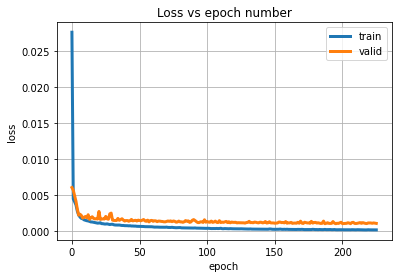

clean_all_outliers2layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers3layers_Lenet5
Scaling images
Scaling complete.
Number of images to be brightened: 7041
Number of images to be dimmed: 7041
Completed brighten and dim. Number of observations added to train: 14082
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_56 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_26 (Averag (None, 47, 47, 6)         0         
_________________________________________________

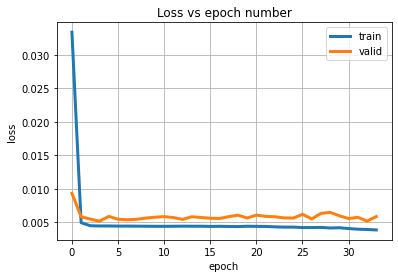

clean_all_outliers3layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers4layers_Lenet5
Scaling images
Scaling complete.
Number of images to be brightened: 7041
Number of images to be dimmed: 7041
Completed brighten and dim. Number of observations added to train: 14082
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_59 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_28 (Averag (None, 47, 47, 6)         0         
_________________________________________________

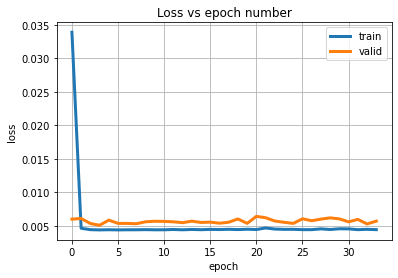

clean_all_outliers4layers_Lenet5 model created and file saved for future use.
End model and train

Begin model and train:
Model name: clean_all_outliers5layers_Lenet5
Scaling images
Scaling complete.
Number of images to be brightened: 7041
Number of images to be dimmed: 7041
Completed brighten and dim. Number of observations added to train: 14082
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 94, 94, 6)         60        
_________________________________________________________________
re_lu_63 (ReLU)              (None, 94, 94, 6)         0         
_________________________________________________________________
average_pooling2d_30 (Averag (None, 47, 47, 6)         0         
_________________________________________________

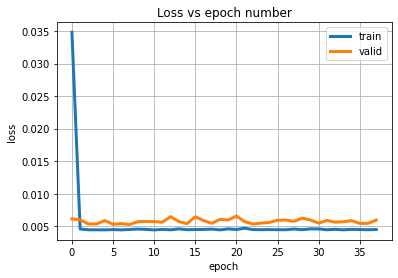

clean_all_outliers5layers_Lenet5 model created and file saved for future use.
End model and train



NameError: name 'set_test_path' is not defined

In [11]:
set_train_paths(model_path = "C:/data/Jackie_Lenet5_BD", train_path= "C:/Data/CleanTrain_1/")
#Get the files in the clean directory, try different layers and ajust the brightness and dim level of each image
create_model(vary_layers = True, hoizontal_flip = False,brightness = 1.4, dim = .3)

#Peform the predictions
set_test_path
create_predictions()

### Approach 4: Use different cleaned versions of train data set flip the images, add brigthness=0 dim = 0 for 30 keypoints and 8 keypoints. 

The following cell is an advanced version.  The images are flipped horizontaly and brightness and dim are set to 0. 

For every model file in a given path, 

- create, train and fit model with augmentation and with 30 keypoints, predict and save predictions
- create, train and fit model with augmentation and with 8 keypoints, predict and save predictions
- combine the predictions into a single file for submission




In this example, I only use the clean_all_outliers clean train file since it produced the best results previously.  

This yielded the 3rd best result:  


![](https://i.imgur.com/RrpnwyW.jpg)


Note: one less layer was tested here

Model dir: C:/data/Jackie_Lenet5_30RawAug/
Opening file:  clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
   

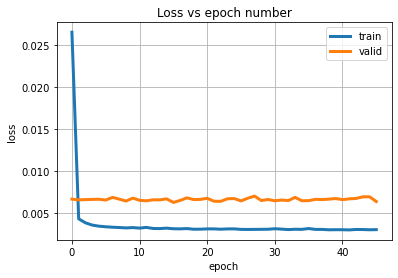

clean_all_outliers_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center

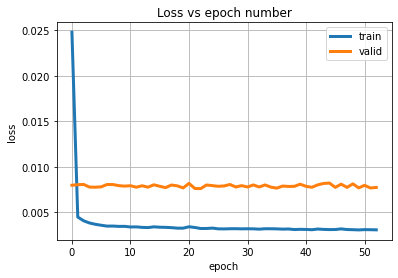

clean_duplicates_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y

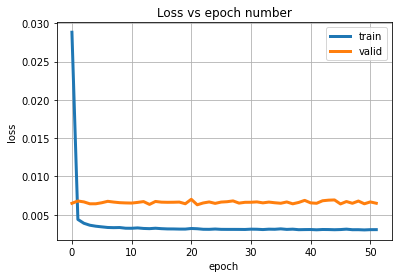

clean_o_dups_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_o_outliers.p
Train Shape: (7020, 31)
Begin model and train:
Model name: clean_o_outliers_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_l

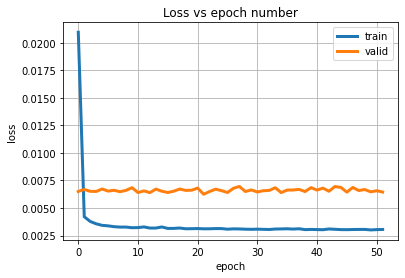

clean_o_outliers_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip

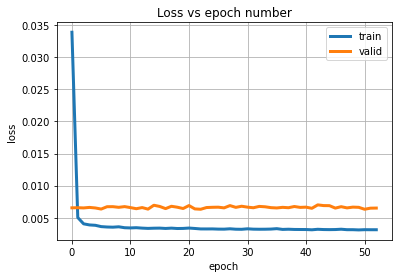

clean_wo_dups_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 

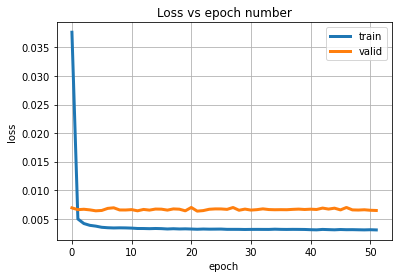

clean_w_dups_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_l

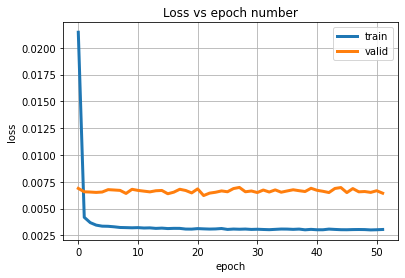

clean_w_outliers_Lenet5 model created and file saved for future use.
End model and train

Model dir: C:/data/Jackie_Lenet5_30RawAug/
Prediction dir: C:/data/Predictions_30/
Working with:  clean_all_outliers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions_30/clean_all_outliers_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_duplicates_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
C:/data/Predictions_30/clean_duplicates_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_o_dups_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (5

In [7]:
#Use 30 keypoints
full_path = "C:/data/Jackie_Lenet5_30RawAug"

set_train_paths(full_path, "C:/Data/CleanTrain_30/")
#Get the files in the clean directory, try different layers to create some models and flip the images horizontally
#create_model(vary_layers = False, hoizontal_flip = False,brightness = 1, dim = 1, seperate = False)
create_model((aug = True, hoizontal_flip = True, brightness = 0, dim = 0)

#Peform the predictions
set_test_paths(prediction_path = "C:/data/Predictions_30/")
create_predictions(columns = "Full")




Model dir: C:/data/Jackie_Lenet5_8RawAug/
Opening file:  clean_all_outliers_8.p
Train Shape: (4751, 9)
Begin model and train:
Model name: clean_all_outliers_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4751, 9)
dim
Number of images to be brightened: 4751
Number of images to be dimmed: 4751
Completed brighten and dim. Number of observations added to train: 9502
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 94, 94, 6)         60        
__________________________________________________

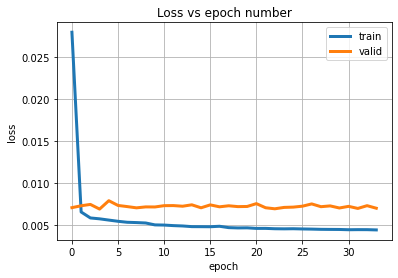

clean_all_outliers_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_duplicates_8.p
Train Shape: (4201, 9)
Begin model and train:
Model name: clean_duplicates_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4201, 9)
dim
Number of images to be brightened: 4201
Number of images to be dimmed: 4201
Completed brighten and dim. Number of observations added to train: 8402
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 94, 94, 6)         60        
_

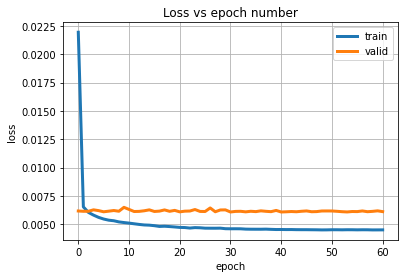

clean_duplicates_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_o_dups_8.p
Train Shape: (4190, 9)
Begin model and train:
Model name: clean_o_dups_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4190, 9)
dim
Number of images to be brightened: 4190
Number of images to be dimmed: 4190
Completed brighten and dim. Number of observations added to train: 8380
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 94, 94, 6)         60        
___________

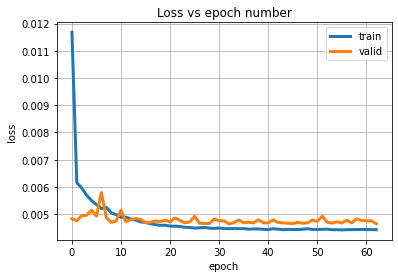

clean_o_dups_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_o_outliers_8.p
Train Shape: (4727, 9)
Begin model and train:
Model name: clean_o_outliers_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4727, 9)
dim
Number of images to be brightened: 4727
Number of images to be dimmed: 4727
Completed brighten and dim. Number of observations added to train: 9454
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 94, 94, 6)         60        
_______

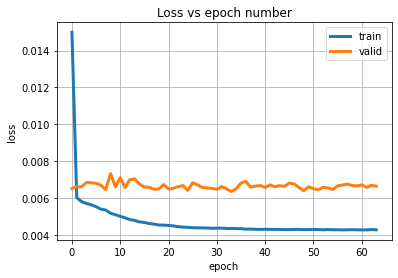

clean_o_outliers_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups_8.p
Train Shape: (4188, 9)
Begin model and train:
Model name: clean_wo_dups_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4188, 9)
dim
Number of images to be brightened: 4188
Number of images to be dimmed: 4188
Completed brighten and dim. Number of observations added to train: 8376
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 94, 94, 6)         60        
_________

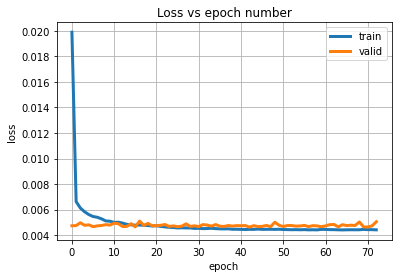

clean_wo_dups_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_w_dups_8.p
Train Shape: (4198, 9)
Begin model and train:
Model name: clean_w_dups_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4198, 9)
dim
Number of images to be brightened: 4198
Number of images to be dimmed: 4198
Completed brighten and dim. Number of observations added to train: 8396
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 94, 94, 6)         60        
______________

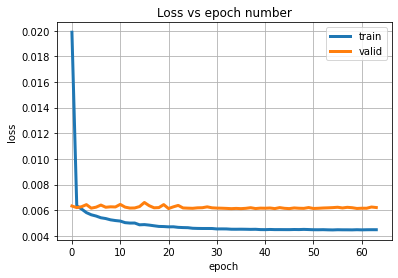

clean_w_dups_8_Lenet5 model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers_8.p
Train Shape: (4751, 9)
Begin model and train:
Model name: clean_w_outliers_8_Lenet5
flip
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4751, 9)
dim
Number of images to be brightened: 4751
Number of images to be dimmed: 4751
Completed brighten and dim. Number of observations added to train: 9502
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 94, 94, 6)         60        
_______

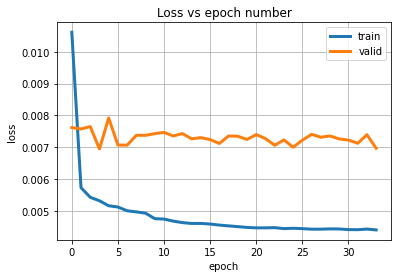

clean_w_outliers_8_Lenet5 model created and file saved for future use.
End model and train

Model dir: C:/data/Jackie_Lenet5_8RawAug/
Prediction dir: C:/data/Predictions_8/
Working with:  clean_all_outliers_8_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after melt: (14264, 3)
after merge: (14250, 2)
C:/data/Predictions_8/clean_all_outliers_8_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_duplicates_8_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after melt: (14264, 3)
after merge: (14250, 2)
C:/data/Predictions_8/clean_duplicates_8_Lenet5Pred.csv
Predictions written 
End model and train

Working with:  clean_o_dups_8_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after mel

In [8]:
#Use only 8 keypoints
seperate_path = "C:/data/Jackie_Lenet5_8RawAug"
set_train_paths(seperate_path, "C:/Data/CleanTrain_8/")
create_model((aug = True, hoizontal_flip = True, brightness = 0, dim = 0, separate = True)
set_test_paths(prediction_path = "C:/data/Predictions_8/")
create_predictions(columns = "False")

combine_predictions("C:/data/Predictions_30/", "C:/data/Predictions_8/" )

### Approach 5: Use only clean_all_outliers of train data set flip the images, add brigthness=1.4 dim = 0.3 for 30 keypoints and 8 keypoints - full layers. 

The following cell is an advanced version.  The images are flipped horizontaly and brightness=1.4 and dim=0.3 

For every model file in a given path, 

- create, train and fit model with augmentation and with 30 keypoints, predict and save predictions
- create, train and fit model with augmentation and with 8 keypoints, predict and save predictions
- combine the predictions into a single file for submission

In this example, I only use the clean_all_outliers clean train file since it produced the best results previously.  

This yielded the best result:  

![](https://i.imgur.com/BiDsWBP.jpg)




In [4]:
#Use 30 keypoints
full_path = "C:/data/Jackie_Lenet5_30_1_layer"

set_train_paths(full_path, "C:/Data/CleanTrain_30_1/")
#Get the files in the clean directory, try different layers to create some models and flip the images horizontally
#create_model(vary_layers = False, hoizontal_flip = False,brightness = 1, dim = 1, seperate = False)
create_model(aug = True, hoizontal_flip = True, brightness = 1.4, dim = 0.3)

#Peform the predictions
set_test_paths(prediction_path = "C:/data/Predictions_30_1_layer/")
create_predictions(columns = "Full")

Model dir: C:/data/Jackie_Lenet5_30_1/
Opening file:  clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_Lenet5
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mout

KeyboardInterrupt: 

Model dir: C:/data/Jackie_Lenet5_8_1/
Opening file:  clean_all_outliers.p
Train Shape: (4751, 9)
Begin model and train:
Model name: clean_all_outliers_Lenet5
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'image'],
      dtype='object')
New Horizontal shape: (4751, 9)
Number of images to be brightened: 4751
Number of images to be dimmed: 4751
Completed brighten and dim. Number of observations added to train: 9502
Scaling images
Scaling complete.
Begining the split of Train with all features
Looking for model JN
JN model file not found. Model creation begnining
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 6)         60        
_________________________________________________________________
r

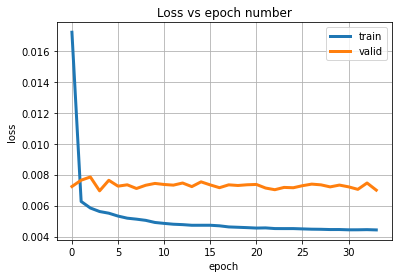

clean_all_outliers_Lenet5 model created and file saved for future use.
End model and train

Model dir: C:/data/Jackie_Lenet5_8_1/
Prediction dir: C:/data/Predictions_8_1/
Working with:  clean_all_outliers_Lenet5
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 8)
after melt: (14264, 3)
after merge: (14250, 2)
C:/data/Predictions_8_1/clean_all_outliers_Lenet5Pred.csv
Predictions written 
End model and train



In [7]:
#Use only 8 keypoints
seperate_path = "C:/data/Jackie_Lenet5_8_1_layer"
set_train_paths(seperate_path, "C:/Data/CleanTrain_8_1/")
create_model(aug = True,hoizontal_flip = True, brightness = 0, dim = 0, separate = True)
set_test_paths(prediction_path = "C:/data/Predictions_8_1/")
create_predictions(columns = "False")


combine_predictions("C:/data/Predictions_30_1/", "C:/data/Predictions_8_1_layer/" )